<a href="https://colab.research.google.com/github/ssoh0102/ConsoleApplication2/blob/master/graph_dfs_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그래프(graphs)!

그래프G는 정점 V와 간선 E로 정의될 수 있다.
이를 위한 class 를 정의해 보자.


In [3]:
class Vertex:
    def __init__(self, v):
        self.neighbors = []
        self.value = v
        self.status = "unvisited"

    def hasNeighbor(self,v):
        if v in self.neighbors:
            return True
        return False

    def getNeighbors(self):
        return self.neighbors

    def addNeighbor(self,v):
        self.neighbors.append(v)

    def __str__(self):
        return str(self.value)

    def __repr__(self):
        return str(self.value)

class Graph:
    def __init__(self):
        self.vertices = []

    def addVertex(self,n):
        self.vertices.append(n)

    # 정점 u와 v에 간선을 추가한다.
    def addEdge(self,u,v):
        u.addNeighbor(v)
        v.addNeighbor(u)

## 렌더링 코드

결과를 보기 위한 렌더링 함수이다. 테스트 전에 꼭 실행하자.

In [4]:
from graphviz import Graph as vizGraph

def renderGraph(g:Graph):
    vg = vizGraph('Graph',strict=True)

    # 정점 추가
    for v in g.vertices:
        if v.status == 'unvisited':
            vg.node(str(v))
        else:
            vg.node(str(v), style='filled', fillcolor='blue', fontcolor='white')

    # 간선 추가
    for v in g.vertices:
        for e in v.neighbors:
            vg.edge(str(v), str(e))

    vg.render('render', view=True)
    return vg


## 체크해보자

잘 작동하는지 테스트 해봅시다.

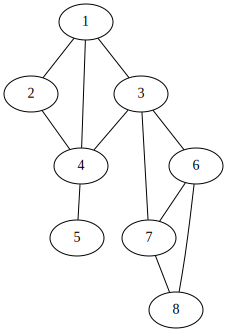

In [5]:
G = Graph()
for i in range(1, 9):
    G.addVertex( Vertex(i) )
V = G.vertices

G.addEdge(V[0], V[1])
G.addEdge(V[0], V[3])
G.addEdge(V[0], V[2])
G.addEdge(V[1], V[3])
G.addEdge(V[2], V[3])
G.addEdge(V[2], V[5])
G.addEdge(V[2], V[6])
G.addEdge(V[3], V[4])
G.addEdge(V[5], V[6])
G.addEdge(V[5], V[7])
G.addEdge(V[6], V[7])

renderGraph(G)

## DFS 구현


In [6]:
def DFS_helper( w ):
    print("entering: ", w)

    #DFS를 구현하시오.
    w.status = "visited"
    for v in w.neighbors:
        if v.status == "unvisited":
            DFS_helper(v)

    print("leaving: ", w)

def DFS( w, G ):
    for v in G.vertices:
        v.status = "unvisited"

    return DFS_helper( w )

아래 테스트 코드를 수행하여 보자. 탐색이 깊이 우선으로 수행되었는지 확인해보자.

entering:  1
entering:  2
entering:  4
entering:  3
entering:  6
entering:  7
entering:  8
leaving:  8
leaving:  7
leaving:  6
leaving:  3
entering:  5
leaving:  5
leaving:  4
leaving:  2
leaving:  1


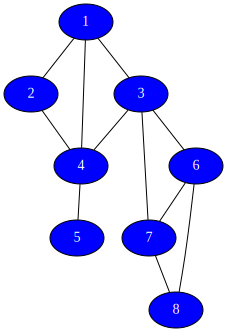

In [7]:
DFS(V[0], G)

renderGraph(G)

## BFS 구현

BFS는 queue 를 이용하여 구현한다.
queue에 값을 넣기 위해서
```python
queue.insert(0, v)
```
로 사용한다. insert(0, v)의미는 0번째 위치에 vertex v 를 넣는다는 것이다.
queue에서 값을 꺼내올 때는  (deqeue)

```python
u = queue.pop()
```
으로 사용한다. queue 의 맨 마지막 값을 u에 받아오는 것이다.
queue를 출력하기 위해서는

```python
print(queue)
```

를 수행하면 된다.

In [8]:
def BFS(w:Vertex, G):
    for v in G.vertices:
        v.status = "unvisited"
    w.status = "visited"

    queue = []
    queue.insert(0, w)

    # BFS를 구현하시오.
    while len(queue) > 0:
        u = queue.pop()
        print(u)
        for v in u.neighbors:
            if v.status == "unvisited":
                v.status = "visited"
                queue.insert(0, v)



1
2
4
3
5
6
7
8


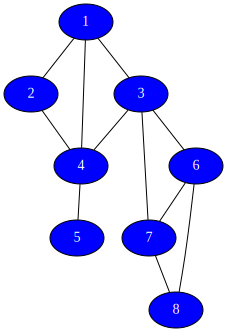

In [9]:
BFS(V[0], G)

renderGraph(G)